In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
df=pd.read_csv(r"C:/Users/PMLS/OneDrive/Desktop/Titanic-Dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [23]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
print("Missing Values Before Cleaning:\n", df.isnull().sum())

Missing Values Before Cleaning:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [19]:
df.fillna({'Age': df['Age'].median(), 'Embarked': df['Embarked'].mode()[0]}, inplace=True)
df.drop(columns=['Cabin'], inplace=True)
df = df.dropna(subset=['Fare'])
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


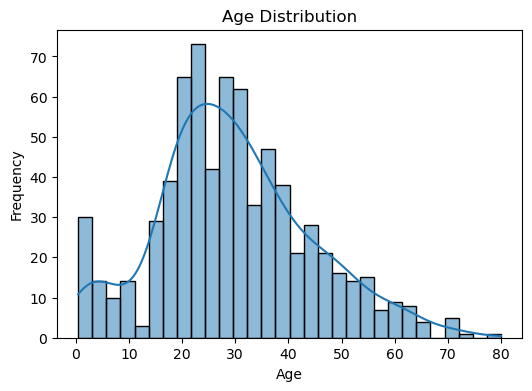

In [27]:
plt.figure(figsize=(6, 4))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

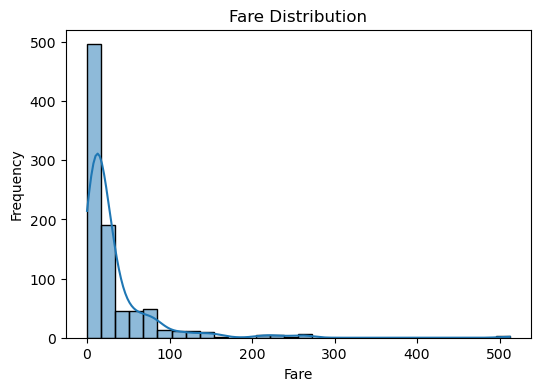

In [29]:
plt.figure(figsize=(6, 4))
sns.histplot(df['Fare'], bins=30, kde=True)
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

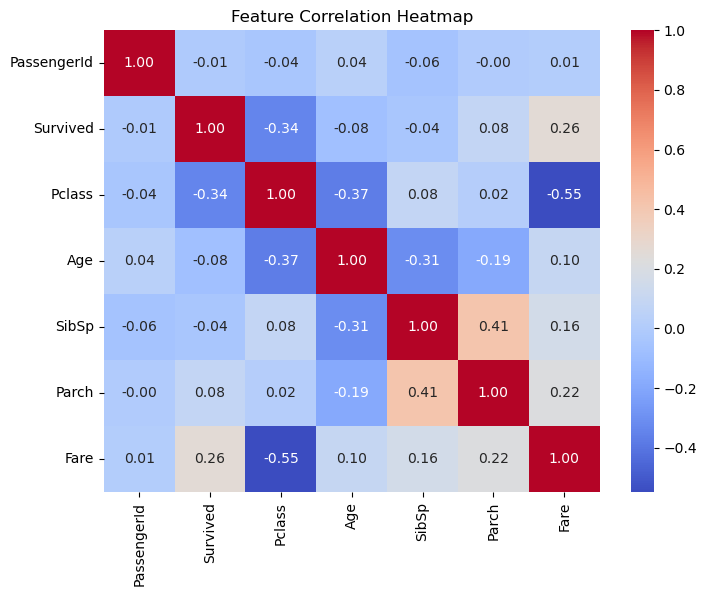

In [41]:
numeric_df = df.select_dtypes(include=['number'])
corr_matrix=numeric_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

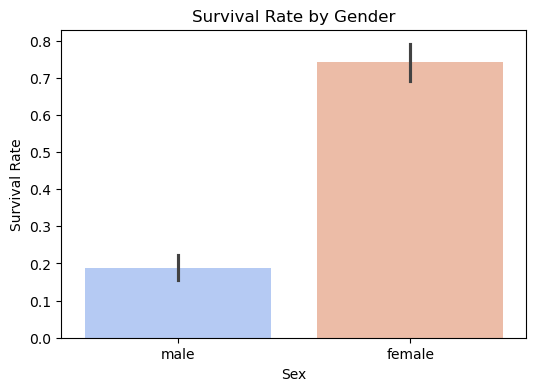

In [63]:
plt.figure(figsize=(6, 4))
sns.barplot(x='Sex', y='Survived', data=df, palette="coolwarm",hue="Sex")
plt.title("Survival Rate by Gender")
plt.ylabel("Survival Rate")
plt.show()

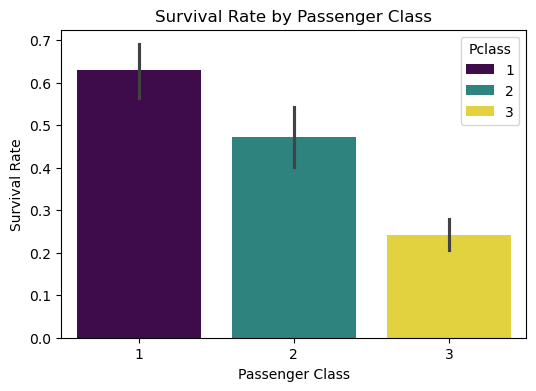

In [67]:
plt.figure(figsize=(6, 4))
sns.barplot(x='Pclass', y='Survived', data=df, palette="viridis", hue="Pclass")
plt.title("Survival Rate by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Survival Rate")
plt.show()

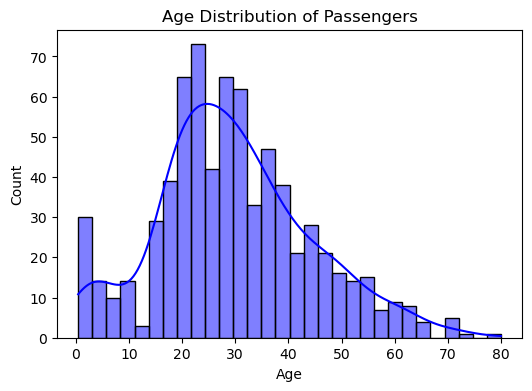

In [69]:
plt.figure(figsize=(6, 4))
sns.histplot(df['Age'], bins=30, kde=True, color='blue')
plt.title("Age Distribution of Passengers")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

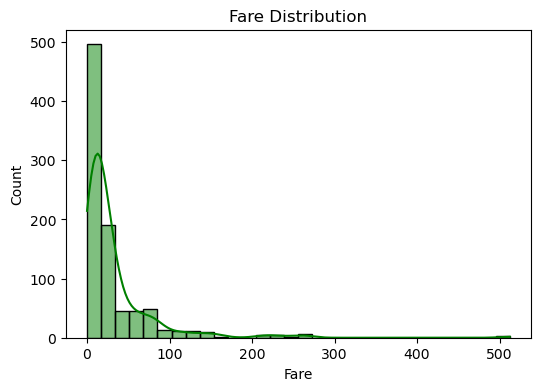

In [71]:
plt.figure(figsize=(6, 4))
sns.histplot(df['Fare'], bins=30, kde=True, color='green')
plt.title("Fare Distribution")
plt.xlabel("Fare")
plt.ylabel("Count")
plt.show()

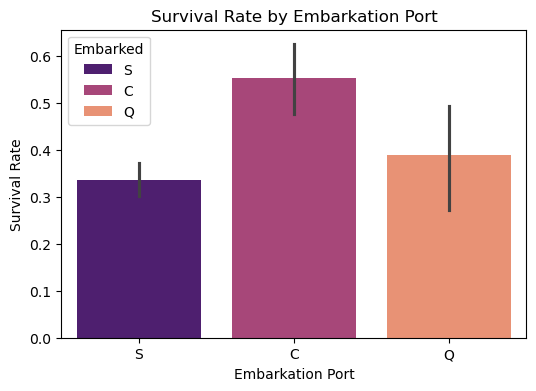

In [75]:
plt.figure(figsize=(6, 4))
sns.barplot(x='Embarked', y='Survived', data=df, palette="magma",hue="Embarked")
plt.title("Survival Rate by Embarkation Port")
plt.xlabel("Embarkation Port")
plt.ylabel("Survival Rate")
plt.show()

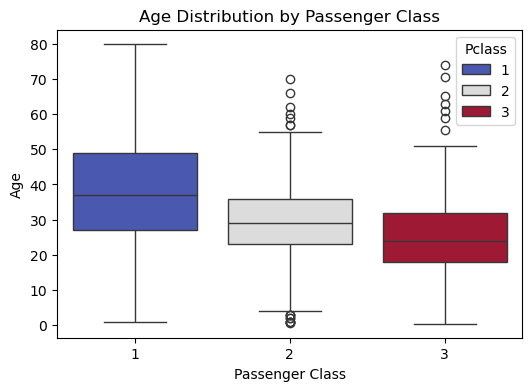

In [81]:
plt.figure(figsize=(6, 4))
sns.boxplot(x="Pclass", y="Age", data=df, palette="coolwarm",hue="Pclass")
plt.title("Age Distribution by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Age")
plt.show()

In [85]:
summary = """
1️ **Survival Rate by Gender:**  
   - Women had a significantly higher survival rate than men.  
   - This aligns with the "women and children first" policy followed during the disaster.  

2️ **Survival Rate by Passenger Class:**  
   - First-class passengers had the highest survival rate.  
   - Third-class passengers had the lowest survival rate, suggesting socio-economic status played a role in survival.  

3️ **Age Distribution:**  
   - Most passengers were young adults, with a peak around 20-30 years old.  
   - Some very young children and elderly passengers were also present.  

4️ **Fare Distribution:**  
   - The fare prices were right-skewed, meaning most passengers paid lower fares, but a few paid very high prices.  
   - Higher fares were associated with first-class tickets, leading to a better chance of survival.  

5️ **Survival Rate by Embarkation Port:**  
   - Passengers who boarded from 'C' (Cherbourg) had a higher survival rate than those from 'S' (Southampton) or 'Q' (Queenstown).  
   - This could be due to a higher number of first-class passengers boarding at Cherbourg.  
"""

print(summary)



1️ **Survival Rate by Gender:**  
   - Women had a significantly higher survival rate than men.  
   - This aligns with the "women and children first" policy followed during the disaster.  

2️ **Survival Rate by Passenger Class:**  
   - First-class passengers had the highest survival rate.  
   - Third-class passengers had the lowest survival rate, suggesting socio-economic status played a role in survival.  

3️ **Age Distribution:**  
   - Most passengers were young adults, with a peak around 20-30 years old.  
   - Some very young children and elderly passengers were also present.  

4️ **Fare Distribution:**  
   - The fare prices were right-skewed, meaning most passengers paid lower fares, but a few paid very high prices.  
   - Higher fares were associated with first-class tickets, leading to a better chance of survival.  

5️ **Survival Rate by Embarkation Port:**  
   - Passengers who boarded from 'C' (Cherbourg) had a higher survival rate than those from 'S' (Southampton) o